In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-hold-energy-data/D202.csv
/kaggle/input/house-hold-energy-data/D202.xlsx


## Data

In [2]:
df = pd.read_csv("/kaggle/input/house-hold-energy-data/D202.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 4.3+ MB


In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


## Preprocessing and cleaning data

In [5]:
df['datetime'] = pd.to_datetime(df['DATE']+ ' '+ df['START TIME'])
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,datetime
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN,2016-10-22 00:00:00
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN,2016-10-22 00:15:00
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN,2016-10-22 00:30:00
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN,2016-10-22 00:45:00
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN,2016-10-22 01:00:00


In [6]:
df = df.set_index('datetime').sort_index()
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
datetime,,,,,,,,
2016-10-22 00:00:00,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
2016-10-22 00:15:00,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2016-10-22 00:30:00,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
2016-10-22 00:45:00,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
2016-10-22 01:00:00,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [7]:
df['COST'] = df['COST'].str.replace('$', '', regex=False).astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70368 entries, 2016-10-22 00:00:00 to 2018-10-24 23:45:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  float64
 7   NOTES       0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 4.8+ MB


In [9]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
datetime,,,,,,,,
2016-10-22 00:00:00,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,0.0,NaN
2016-10-22 00:15:00,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,0.0,NaN
2016-10-22 00:30:00,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,0.0,NaN
2016-10-22 00:45:00,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,0.0,NaN
2016-10-22 01:00:00,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,0.0,NaN


In [10]:
df = df.drop(['DATE','START TIME', 'END TIME', 'NOTES', 'TYPE', 'UNITS'], axis=1)
df.head()

,USAGE,COST
datetime,,
2016-10-22 00:00:00,0.01,0.0
2016-10-22 00:15:00,0.01,0.0
2016-10-22 00:30:00,0.01,0.0
2016-10-22 00:45:00,0.01,0.0
2016-10-22 01:00:00,0.01,0.0


In [11]:
df_hourly = df.resample('H').sum()
df_hourly.head(10)


/tmp/ipykernel_36/2588795083.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').sum()


,USAGE,COST
datetime,,
2016-10-22 00:00:00,0.04,0.0
2016-10-22 01:00:00,0.04,0.0
2016-10-22 02:00:00,0.08,0.0
2016-10-22 03:00:00,0.04,0.0
2016-10-22 04:00:00,0.04,0.0
2016-10-22 05:00:00,0.04,0.0
2016-10-22 06:00:00,0.04,0.0
2016-10-22 07:00:00,0.04,0.0
2016-10-22 08:00:00,0.08,0.0


In [12]:
# Hour of the day (0–23)
df_hourly['hour'] = df_hourly.index.hour

# Day of the week (0=Monday, 6=Sunday)
df_hourly['dayofweek'] = df_hourly.index.dayofweek

# Month (1–12)
df_hourly['month'] = df_hourly.index.month

# Day of the year (1–365/366)
df_hourly['dayofyear'] = df_hourly.index.dayofyear


In [13]:
df_hourly.head()

,USAGE,COST,hour,dayofweek,month,dayofyear
datetime,,,,,,
2016-10-22 00:00:00,0.04,0.0,0,5,10,296
2016-10-22 01:00:00,0.04,0.0,1,5,10,296
2016-10-22 02:00:00,0.08,0.0,2,5,10,296
2016-10-22 03:00:00,0.04,0.0,3,5,10,296
2016-10-22 04:00:00,0.04,0.0,4,5,10,296


## Visualize

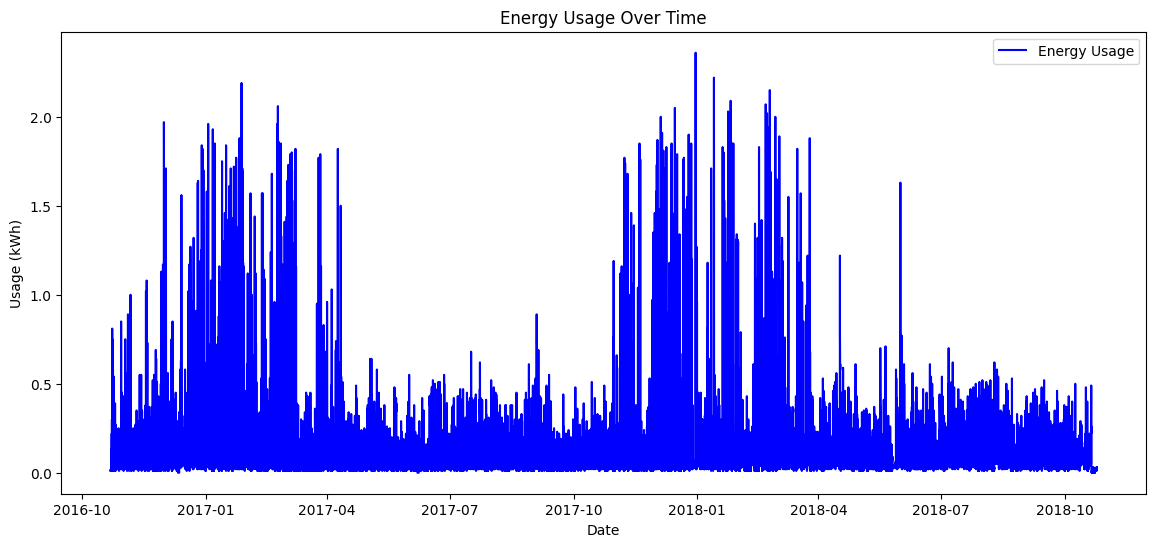

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df.index, df['USAGE'], label='Energy Usage', color='blue')
plt.title('Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.show()


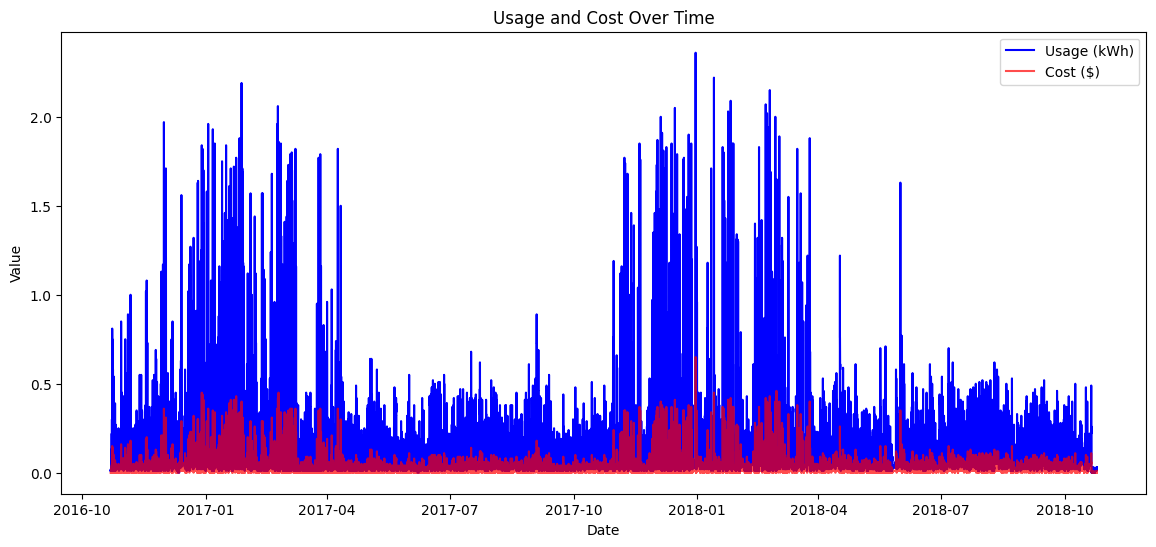

In [15]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['USAGE'], label='Usage (kWh)', color='blue')
plt.plot(df.index, df['COST'], label='Cost ($)', color='red', alpha=0.7)
plt.title('Usage and Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [16]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear


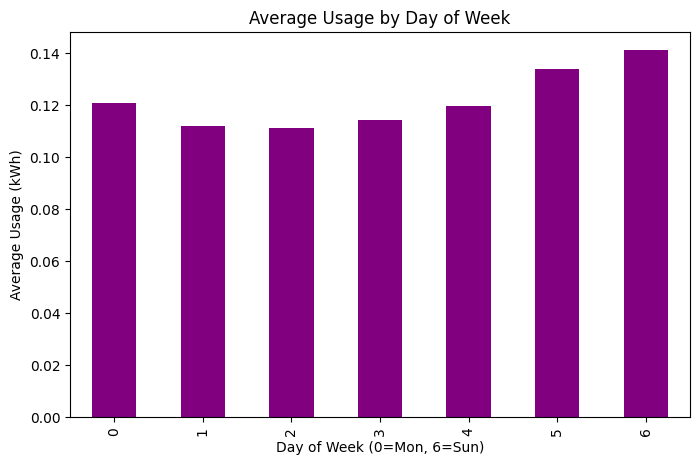

In [17]:
plt.figure(figsize=(8,5))
df.groupby('dayofweek')['USAGE'].mean().plot(kind='bar', color='purple')
plt.title('Average Usage by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Usage (kWh)')
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70368 entries, 2016-10-22 00:00:00 to 2018-10-24 23:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USAGE      70368 non-null  float64
 1   COST       70368 non-null  float64
 2   hour       70368 non-null  int32  
 3   dayofweek  70368 non-null  int32  
 4   month      70368 non-null  int32  
 5   dayofyear  70368 non-null  int32  
dtypes: float64(2), int32(4)
memory usage: 2.7 MB


## Split data

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ----------------------------
# Step 1: Chronological Split
# ----------------------------

split_index = int(len(df) * 0.8)  # 80% train, 20% test

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# ----------------------------
# Step 2: Scale Features
# ----------------------------

scaler = MinMaxScaler()

# Fit only on training data
scaler.fit(train_df)

# Transform both train and test sets
train_scaled = scaler.transform(train_df)
test_scaled = scaler.transform(test_df)

# Convert back to DataFrames (optional but nice)
train_scaled = pd.DataFrame(train_scaled, columns=df.columns, index=train_df.index)
test_scaled = pd.DataFrame(test_scaled, columns=df.columns, index=test_df.index)

# ----------------------------
# Step 3: Separate Features & Target
# ----------------------------

X_train = train_scaled.drop('USAGE', axis=1)
y_train = train_scaled['USAGE']

X_test = test_scaled.drop('USAGE', axis=1)
y_test = test_scaled['USAGE']

print("✅ Train shape:", X_train.shape, y_train.shape)
print("✅ Test shape:", X_test.shape, y_test.shape)

✅ Train shape: (56294, 5) (56294,)
✅ Test shape: (14074, 5) (14074,)


## Creating time windows

In [20]:
import numpy as np

def create_time_windows(dataset, target_col='USAGE', history_size=24, target_size=1):
    """
    Converts a time series DataFrame into (X, y) pairs for RNNs/LSTMs.

    Parameters:
        dataset (pd.DataFrame): Scaled time series data.
        target_col (str): The column to predict (e.g., 'USAGE').
        history_size (int): Number of past time steps to use as input.
        target_size (int): Number of future steps to predict (default=1).

    Returns:
        X (np.ndarray): Shape (samples, history_size, num_features)
        y (np.ndarray): Shape (samples,)
    """
    X, y = [], []
    target_index = dataset.columns.get_loc(target_col)
    data = dataset.values

    for i in range(history_size, len(data) - target_size + 1):
        X.append(data[i - history_size:i])  # past `history_size` rows
        y.append(data[i + target_size - 1, target_index])  # target at +target_size

    return np.array(X), np.array(y)


In [21]:
# Create time windows (using 24 past hours to predict next hour)
history_size = 24
target_size = 1

X_train_seq, y_train_seq = create_time_windows(train_scaled, history_size=history_size, target_size=target_size)
X_test_seq, y_test_seq = create_time_windows(test_scaled, history_size=history_size, target_size=target_size)

print("✅ Train sequences:", X_train_seq.shape)
print("✅ Test sequences:", X_test_seq.shape)


✅ Train sequences: (56270, 24, 6)
✅ Test sequences: (14050, 24, 6)


## Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define model parameters
history_size = 24     # same as you used before
num_features = X_train_seq.shape[2]  # number of columns in your data
lstm_units = 50       # number of neurons in LSTM layer

# Build the model
model = Sequential([
    LSTM(units=lstm_units, return_sequences=True, input_shape=(history_size, num_features)),
    Dropout(0.2),
    
    # Optional stacked LSTM for deeper learning
    LSTM(units=50),
    Dropout(0.2),
    
    # Final output layer predicting 1 value (USAGE)
    Dense(1)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',   # Mean Squared Error for regression
    metrics=['mae']
)

model.summary()


2025-10-08 05:49:08.559915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759902548.734149      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759902548.797334      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1759902560.373300      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759902560.374059      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,          # stop if no improvement for 5 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=50,           # you can start with 20–50
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50


I0000 00:00:1759902565.159148     107 cuda_dnn.cc:529] Loaded cuDNN version 90300


880/880 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0059 - mae: 0.0407 - val_loss: 5.5145e-04 - val_mae: 0.0109
Epoch 2/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0028 - mae: 0.0226 - val_loss: 6.5945e-04 - val_mae: 0.0177
Epoch 3/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0027 - mae: 0.0206 - val_loss: 4.8926e-04 - val_mae: 0.0093
Epoch 4/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0027 - mae: 0.0198 - val_loss: 4.5818e-04 - val_mae: 0.0088
Epoch 5/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0021 - mae: 0.0179 - val_loss: 4.8130e-04 - val_mae: 0.0119
Epoch 6/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0020 - mae: 0.0170 - val_loss: 4.7739e-04 - val_mae: 0.0098
Epoch 7/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0021 - mae: 0.0167 - val_loss: 4.5654e-04 - val_mae: 0.0113
Epoch 8/50
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0020 - mae: 0.0167 - val_loss: 4.4201e-04 - val_mae: 0.0109
Epoch 9/50
880/880 ━━━━━━━━━━━━━━━

440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
📊 Model Evaluation:
Mean Absolute Error (MAE): 0.0205
Mean Squared Error (MSE): 0.0024
Root Mean Squared Error (RMSE): 0.0488


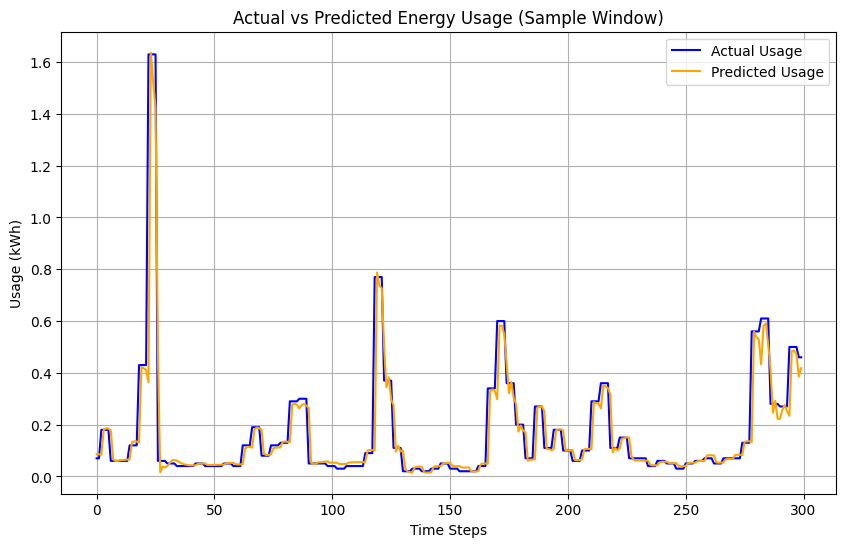

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1️⃣ Generate Predictions
y_pred = model.predict(X_test_seq)

# 2️⃣ Inverse Scale (only for USAGE column)
# assuming 'scaler' was fitted on the entire feature set
# and 'USAGE' is the first column in the original data
y_pred_inv = scaler.inverse_transform(
    np.concatenate([y_pred, np.zeros((y_pred.shape[0], df.shape[1]-1))], axis=1)
)[:, 0]

y_test_inv = scaler.inverse_transform(
    np.concatenate([y_test_seq.reshape(-1, 1), np.zeros((y_test_seq.shape[0], df.shape[1]-1))], axis=1)
)[:, 0]

# 3️⃣ Evaluate Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 4️⃣ Visualize Predictions vs Actual
plt.figure(figsize=(10,6))
plt.plot(y_test_inv[:300], label='Actual Usage', color='blue')
plt.plot(y_pred_inv[:300], label='Predicted Usage', color='orange')
plt.title("Actual vs Predicted Energy Usage (Sample Window)")
plt.xlabel("Time Steps")
plt.ylabel("Usage (kWh)")
plt.legend()
plt.grid(True)
plt.show()
